In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import dataset_generation as dg

import ManifoldSculpting as ms
from ManifoldSculpting_gabri import ManifoldSculpting as ms_gabri

from sklearn.metrics import mean_squared_error
from sklearn.manifold import Isomap, LocallyLinearEmbedding

In [4]:
data_folder = '../data/'
neighbors = np.linspace(20, 80, 4).astype(int)

n_comps: int = 2

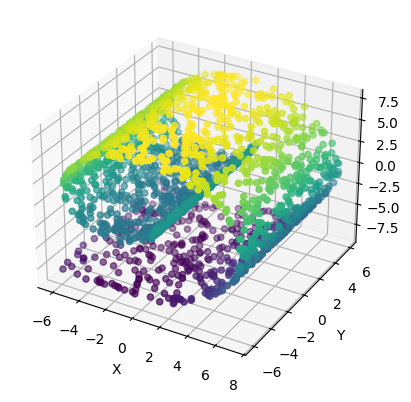

In [19]:
# dataset = dg.swissRoll(2000)
# X = dataset.swissRoll3D()
# X_2D = dataset.swissRoll2D()


# np.savetxt(data_folder + "datasets/swissRoll3D.csv", X, delimiter=",")
# np.savetxt(data_folder + "datasets/swissRoll2D.csv", X_2D, delimiter=",")

X = np.loadtxt(data_folder + "datasets/swissRoll3D.csv", delimiter=",")
X_2D = np.loadtxt(data_folder + "datasets/swissRoll2D.csv", delimiter=",")

X = X - np.mean(X, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=X[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [28]:
n_neighbors = 25
n_comps = 2

# Isomap
iso = Isomap(n_neighbors=n_neighbors, n_components=n_comps)

# LLE
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_comps)

# Manifold Sculpting
ms_model = ms.ManifoldSculpting(D_pres=n_comps, n_neighbors=n_neighbors)

# Manifold Sculpting Gabri
msg_model = ms_gabri(k=n_neighbors,sigma=0.98,niter=800,rotate=True,patience=50)


In [29]:
X_iso = iso.fit_transform(X)
X_lle = lle.fit_transform(X)
X_ms = ms_model.fit_transform(X)

Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.



In [30]:
X_msg = msg_model.fit(X.astype(np.float32) - np.mean(X, axis=0).astype(np.float32))

ZeroDivisionError: division by zero

In [ ]:
mse_isomap = []
mse_LLE = []
# mse_HLLE = []
mse_MS = []

for n in neighbors:
    isomap = Isomap(n_neighbors=n, n_components=n_comps, metric='euclidean')
    X_isomap = isomap.fit_transform(X)
    mse_isomap.append(mean_squared_error(X_2D, X_isomap))
    np.savetxt(data_folder + "datasets/swissRollIsomap" + str(n) + ".csv", X_isomap, delimiter=",")

    LLE = LocallyLinearEmbedding(n_neighbors=n, n_components=n_comps)
    X_LLE = LLE.fit_transform(X)
    mse_LLE.append(mean_squared_error(X_2D, X_LLE))
    np.savetxt(data_folder + "datasets/swissRollLLE" + str(n) + ".csv", X_LLE, delimiter=",")

    # HLLE = LocallyLinearEmbedding(n_neighbors=n, n_components=n_comps, method='hessian')
    # X_HLLE = HLLE.fit_transform(X)
    # mse_HLLE.append(mean_squared_error(X_2D, X_HLLE))

    MS = ms.ManifoldSculpting(n_neighbors=n, D_pres=n_comps)
    X_MS = MS.fit_transform(X)
    mse_MS.append(mean_squared_error(X_2D, X_MS[:, :n_comps]))
    np.savetxt(data_folder + "datasets/swissRollMS" + str(n) + ".csv", X_MS, delimiter=",")

(2000, 3)


ValueError: y_true and y_pred have different number of output (2!=3)

In [ ]:
np.savetxt(data_folder + "results_swissRoll/mseIsomap.csv", mse_isomap, delimiter=",")
np.savetxt(data_folder + "results_swissRoll/mseLLE.csv", mse_LLE, delimiter=",")
# np.savetxt(data_folder + "results_swissRoll/mseHLLE.csv", mse_HLLE, delimiter=",")
np.savetxt(data_folder + "results_swissRoll/mseMS.csv", mse_MS, delimiter=",")

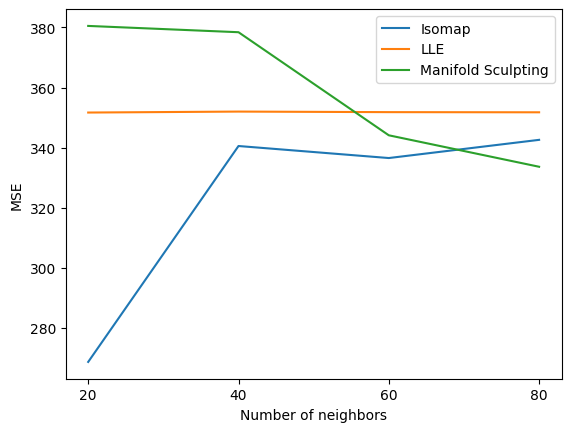

In [ ]:
mse_isomap = np.loadtxt(data_folder + "results_swissRoll/mseIsomap.csv", delimiter=",")
mse_LLE = np.loadtxt(data_folder + "results_swissRoll/mseLLE.csv", delimiter=",")
# mse_HLLE = np.loadtxt(data_folder + "results_swissRoll/mseHLLE.csv", delimiter=",")
mse_MS = np.loadtxt(data_folder + "results_swissRoll/mseMS.csv", delimiter=",")

plt.plot(neighbors, mse_isomap, label='Isomap')
plt.plot(neighbors, mse_LLE, label='LLE')
# plt.plot(neighbors[:len(mse_HLLE)], mse_HLLE, label='HLLE')
plt.plot(neighbors, mse_MS, label='Manifold Sculpting')
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.legend()
plt.xticks(neighbors)
plt.savefig(data_folder + "results_swissRoll/mse.png")

NameError: name 'X_LLE' is not defined

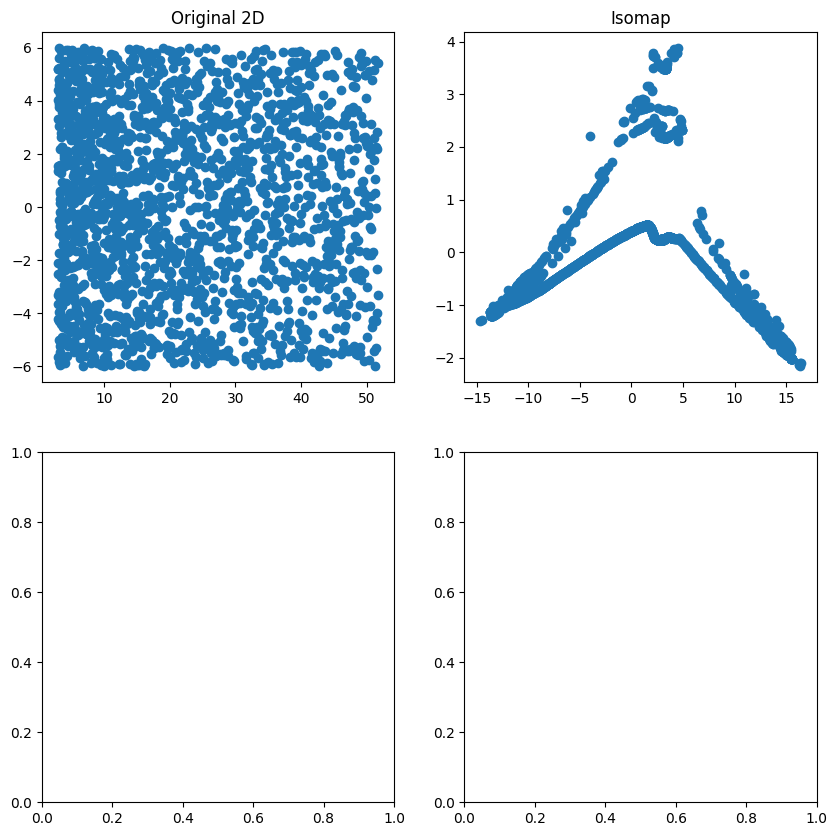

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(X_2D[:, 0], X_2D[:, 1])
axs[0, 0].set_title('Original 2D')

axs[0, 1].scatter(X_isomap[:, 0], X_isomap[:, 1])
axs[0, 1].set_title('Isomap')

axs[1, 0].scatter(X_LLE[:, 0], X_LLE[:, 1])
axs[1, 0].set_title('LLE')

axs[1, 1].scatter(X_MS[:, 0], X_MS[:, 1])
axs[1, 1].set_title('Manifold Sculpting')

plt.show()

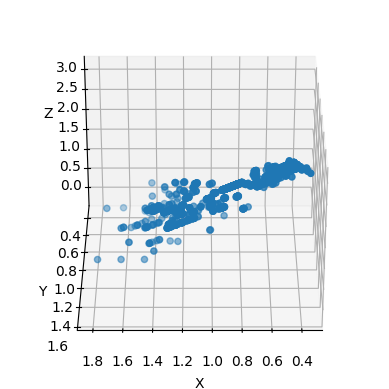

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_MS[:, 0], X_MS[:, 1], X_MS[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=30, azim=90)
plt.show()

In [ ]:
sizes = [250, 500, 1000, 2000, 4000]

# for s in sizes:
#     dataset = dg.sCurve(s)
#     X = dataset.sCurve3D()
#     X_2D = dataset.sCurve2D()


#     np.savetxt(data_folder + f"datasets/sCurve3D_{s}.csv", X, delimiter=",")
#     np.savetxt(data_folder + f"datasets/swissRoll2D_{s}.csv", X_2D, delimiter=",")

# X = np.loadtxt(data_folder + "datasets/swissRoll3D.csv", delimiter=",")
# X_2D = np.loadtxt(data_folder + "datasets/swissRoll2D.csv", delimiter=",")

In [ ]:
mse_isomap = []
mse_LLE = []
mse_MS = []

for s in sizes:
    dataset = dg.sCurve(s)
    X = dataset.sCurve3D()
    X_2D = dataset.sCurve2D()
    X_trans_isomap = Isomap(n_neighbors=14, n_components=n_comps).fit_transform(X)

    np.savetxt(data_folder + f"results_sCurve/isomap_{s}.csv", X_trans_isomap, delimiter=",")
               

    X_trans_LLE = LocallyLinearEmbedding(n_neighbors=14, n_components=n_comps).fit_transform(X)

    np.savetxt(data_folder + f"results_sCurve/LLE_{s}.csv", X_trans_LLE, delimiter=",")

    X_trans_MS = ms.ManifoldSculpting(14, 2).fit_transform(X)

    np.savetxt(data_folder + f"results_sCurve/MS_{s}.csv", X_trans_MS, delimiter=",")


    # np.savetxt(data_folder + f"swissRoll_LLE_{n}.csv", X_trans_LLE, delimiter=",")
    
    mse_isomap.append(mean_squared_error(X_trans_isomap, X_2D))
    mse_LLE.append(mean_squared_error(X_trans_LLE, X_2D))
    mse_MS.append(mean_squared_error(X_trans_MS[:, :2], X_2D))
    print(f"n_neighbors = {s} done")


mse_isomap = np.savetxt(data_folder + "results_sCurve/mse_isomap.csv", mse_isomap, delimiter=",")
mse_LLE = np.savetxt(data_folder + "results_sCurve/mse_LLE.csv", mse_LLE, delimiter=",")
mse_MS = np.savetxt(data_folder + "results_sCurve/mse_MS.csv", mse_MS, delimiter=",")


Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.

n_neighbors = 250 done
Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.

n_neighbors = 500 done
Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.

n_neighbors = 1000 done
Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.

n_neighbors = 2000 done
Step 1 done.

Step 2 done.

Step 3 done.

Step 4 done.

n_neighbors = 4000 done


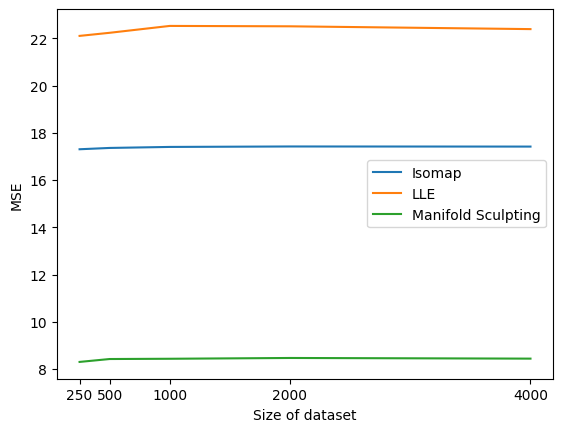

In [ ]:
mse_isomap = np.loadtxt(data_folder + "results_sCurve/mse_isomap.csv", delimiter=",")
mse_LLE = np.loadtxt(data_folder + "results_sCurve/mse_LLE.csv", delimiter=",")
mse_MS = np.loadtxt(data_folder + "results_sCurve/mse_MS.csv", delimiter=",")
plt.plot(sizes, mse_isomap, label='Isomap')
plt.plot(sizes, mse_LLE, label='LLE')
plt.plot(sizes, mse_MS, label='Manifold Sculpting')
plt.xlabel('Size of dataset')
plt.ylabel('MSE')
plt.legend()
plt.xticks(sizes)
plt.savefig(data_folder + "results_sCurve/mse.png")

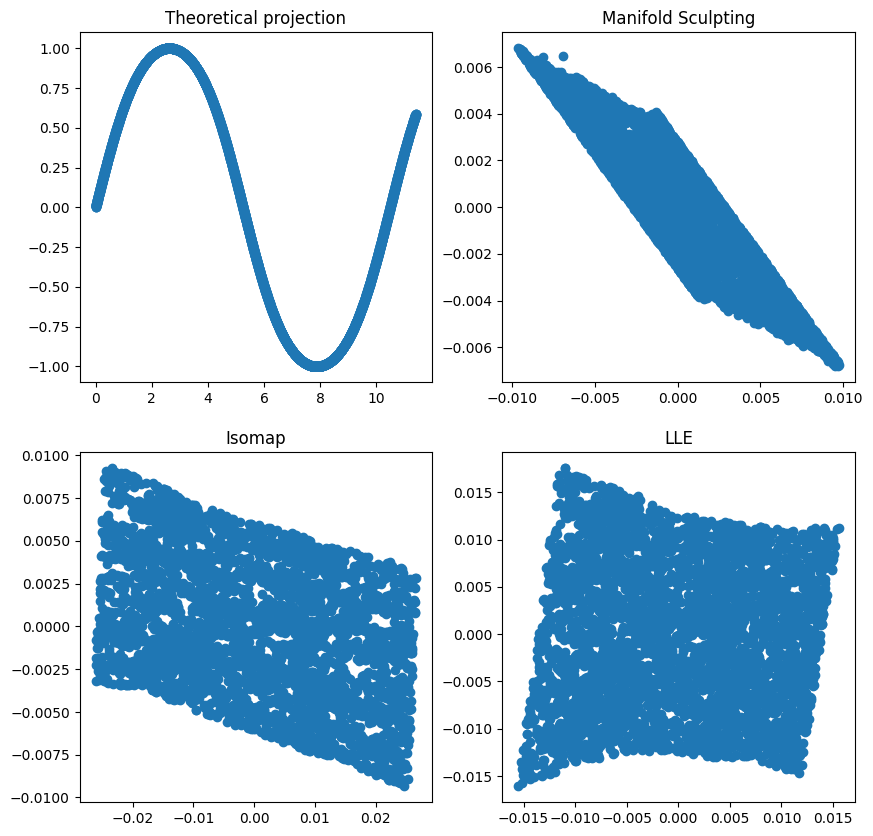

In [ ]:
from scipy.spatial import procrustes

_, m2_MS, d_ms = procrustes(X_2D, X_trans_MS[:, :2])
_, m2_isomap, d_isomap = procrustes(X_2D, X_trans_isomap)
_, m2_LLE, d_LLE = procrustes(X_2D, X_trans_LLE)

fog, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(X_2D[:, 0], X_2D[:, 1])
axs[0, 0].set_title("Theoretical projection")

axs[0, 1].scatter(m2_MS[:, 0], m2_MS[:, 1])
axs[0, 1].set_title("Manifold Sculpting")

axs[1, 0].scatter(m2_isomap[:, 0], m2_isomap[:, 1])
axs[1, 0].set_title("Isomap")

axs[1, 1].scatter(m2_LLE[:, 0], m2_LLE[:, 1])
axs[1, 1].set_title("LLE")
plt.show()

In [ ]:
print(d_ms, d_isomap, d_LLE)

0.878466223963805 0.08176569066969581 0.51168287393354


In [ ]:
mean_squared_error(m2_isomap, X_2D), mean_squared_error(X_2D, m2_LLE), mean_squared_error(X_2D, m2_MS)
# mean_squared_error(X_trans_MS, X_2D)

(np.float64(22.395127389400546),
 np.float64(22.418331860822057),
 np.float64(22.438128728905124))

In [36]:
import ManifoldSculpting_v1 as ms_v1

X = np.random.rand(5, 3)

print(X)

ms_v1.ManifoldSculpting._findNearestNeighbors(X, 5)

[[0.07413855 0.07393041 0.55132368]
 [0.25041147 0.94192327 0.73971816]
 [0.47558133 0.80294974 0.04185103]
 [0.47215288 0.39671827 0.74417947]
 [0.4401138  0.69316914 0.80801549]]


(array([[0.54754066, 0.76373109, 0.90552539, 0.97580115],
        [0.32020323, 0.58858953, 0.74634686, 0.90552539],
        [0.74634686, 0.77480172, 0.8113575 , 0.97580115],
        [0.30493386, 0.54754066, 0.58858953, 0.8113575 ],
        [0.30493386, 0.32020323, 0.76373109, 0.77480172]]),
 array([[3, 4, 1, 2],
        [4, 3, 2, 0],
        [1, 4, 3, 0],
        [4, 0, 1, 2],
        [3, 1, 0, 2]]))